In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def erf():
    return np.random.standard_normal()

def normal_function(time):
    return 25 - .0001 * (time - 37)**2 + erf()
def problem_function(time):
    return 60 - 1 * (time - 37)**2 + erf()

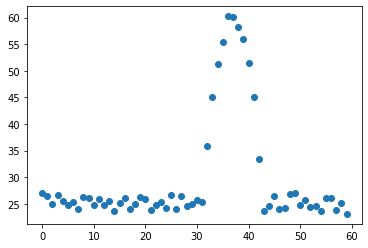

In [3]:
time = [a for a in range(60)]
temp = [normal_function(t) if t < 31 or t > 43 else problem_function(t) for t in time]

plt.scatter(time, temp)

In [4]:
def ambient_temp(time):
    return .1*(time - 14)**2

## For CAT DG175
https://s7d2.scene7.com/is/content/Caterpillar/CM20180910-26543-36511

designed to operate in 50C temp
rated engine speed 1800 RPM

local ambient temperature = global ambient temperature + operating temperature

operating temperature = usage * C

temp faximaly = $variance[-\cos(\frac{x-2}{1.2\pi})] + (1 + \text{avg temp})$


## Scenario
Temperature reading from local weather data

Usage reading from CAT Powersupply

Combine the two to approximate the local ambient temperature for the Powersupply

In [5]:
def glob_ambient_temp(t):
    return 10*(-np.cos((t - 2) / (1.2 * np.pi))) + 25

def usage(t):
    o = 14
    d = 4
    x = (t - 14) / 4
    u = -20*(x**4 + 2*x**3 + x**2) + 10
    return u if u > 0 else 0

def local_ambient_temp(t):
    return glob_ambient_temp(t) + usage(t) * 1.8



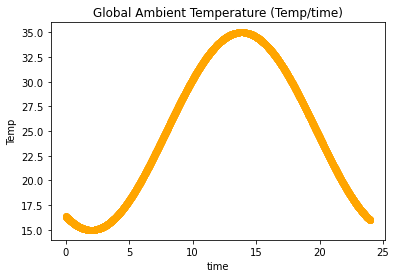

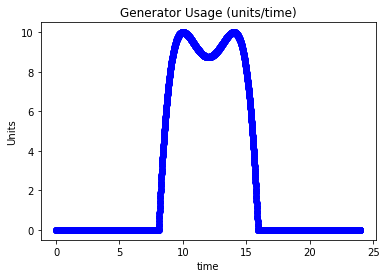

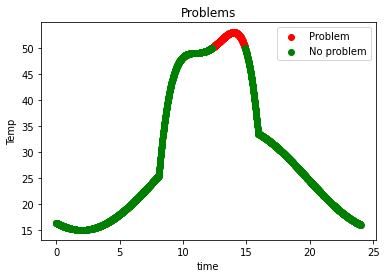

In [6]:

time = list(np.arange(0, 24, .01))

"""GLOBAL TEMP"""
global_temp = [glob_ambient_temp(t) for t in time]

plt.scatter(time, global_temp, c="orange")
plt.title("Global Ambient Temperature (Temp/time)")
plt.ylabel("Temp")
plt.xlabel("time")
plt.show()

"""GENERATOR USAGE"""
usages = [usage(t) for t in time]

plt.scatter(time, usages, c="b")
plt.title("Generator Usage (units/time)")
plt.ylabel("Units")
plt.xlabel("time")
plt.show()

"""LOCAL TEMP & Problems"""
SAFE_TEMP = 50

local_temp = [local_ambient_temp(t) for t in time]

problem = list(filter(lambda p: p[1] > SAFE_TEMP, zip(time, local_temp)))
px = [p[0] for p in problem]
py = [p[1] for p in problem]

safe = list(filter(lambda p: p[1] <= SAFE_TEMP, zip(time, local_temp)))
sx = [p[0] for p in safe]
sy = [p[1] for p in safe]

plt.scatter(px, py, c="r", label="Problem")
plt.scatter(sx, sy, c="g", label="No problem")
plt.legend()
plt.title("Problems")

plt.ylabel("Temp")
plt.xlabel("time")

plt.show()


In [7]:
len(problem)
len(safe)

2140